#Decision Trees

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style
plt.rcParams['figure.figsize'] = (10.0, 8.0)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import call
import pydotplus
from IPython.display import Image

%load_ext autoreload
%autoreload 2

Complete the incomplete parts in `Courses/MachineLearning/Labs/Lab_files/Lab4/decision_tree.py` script and import the `DTClassifier`. If you have never used recursive functions in python before, you may want to read [this](https://realpython.com/python-thinking-recursively/) or any similar tutorial to have more idea about the recursive functions in the code. 

The dataset that we will work with, is the famous Titanic dataset from [kaggle](https://www.kaggle.com/c/titanic).

In [ ]:
from decision_tree import DTClassifier

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
data = df[['Pclass', 'Sex', 'Survived']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Survived'),
                                                    data[['Survived']],
                                                    random_state=0)

In [ ]:
start = time.perf_counter()
model = DTClassifier(impurity='gini')
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
print('Train accuracy: ', accuracy_score(model.predict(X_train), y_train))
print('Test accuracy: ', accuracy_score(model.predict(X_test), y_test))

Time taken: 0.005134114000156842 sec
Train accuracy:  0.7889221556886228
Test accuracy:  0.7802690582959642


In [ ]:
start = time.perf_counter()
model = DTClassifier(impurity='entropy')
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
print('Train accuracy: ', accuracy_score(model.predict(X_train), y_train))
print('Test accuracy: ', accuracy_score(model.predict(X_test), y_test))

Time taken: 0.004814097000007678 sec
Train accuracy:  0.7889221556886228
Test accuracy:  0.7802690582959642


You should get about $78\%$ accuracy in both cases.

In [ ]:
data_with_age = df[['Pclass', 'Sex', 'Age', 'Survived']]

In [ ]:
data_with_age.isna().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

Let's remove the rows with missing data.

In [ ]:
data_with_age = data_with_age.dropna()

In [ ]:
data_with_age.shape

(714, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_with_age.drop(columns='Survived'),
                                                    data_with_age[['Survived']],
                                                    random_state=0)

In [ ]:
start = time.perf_counter()
model = DTClassifier(impurity='gini')
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
print('Train accuracy: ', accuracy_score(model.predict(X_train), y_train))
print('Test accuracy: ', accuracy_score(model.predict(X_test), y_test))

Time taken: 0.23962121099998512 sec
Train accuracy:  0.902803738317757
Test accuracy:  0.8044692737430168


In [ ]:
start = time.perf_counter()
model = DTClassifier(impurity='entropy')
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
print('Train accuracy: ', accuracy_score(model.predict(X_train), y_train))
print('Test accuracy: ', accuracy_score(model.predict(X_test), y_test))

Time taken: 0.23205236100011462 sec
Train accuracy:  0.902803738317757
Test accuracy:  0.8044692737430168


Here you should get about $80\%$ accuracy in both cases.

Let's compare with sklearn's implementation as always. We need to encode the non-numeric features first.

In [ ]:
data1 = pd.get_dummies(data, drop_first=True)
X = data1.drop(columns='Survived')
y = data1[['Survived']]

X_train1, X_test1, y_train, y_test = train_test_split(X,
                                                      y,
                                                      random_state=0)

In [ ]:
data1.head()

,Pclass,Survived,Sex_male
0,3,0,1
1,1,1,0
2,3,1,0
3,1,1,0
4,3,0,1


In [ ]:
X_train1.head()

,Pclass,Sex_male
105,3,1
68,3,0
253,3,1
320,3,1
706,2,0


In [ ]:
start = time.perf_counter()
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(X_train1, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
print('Train accuracy: ', accuracy_score(model1.predict(X_train1), y_train))
print('Test accuracy: ', accuracy_score(model1.predict(X_test1), y_test))

Time taken: 0.002783854999961477 sec
Train accuracy:  0.7889221556886228
Test accuracy:  0.7802690582959642


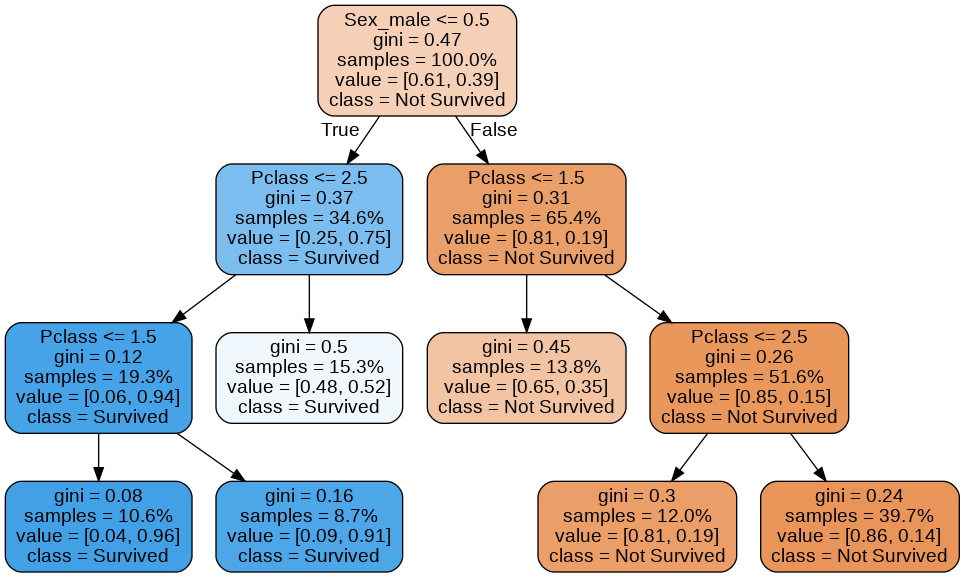

In [ ]:
dot_data = export_graphviz(model1, out_file=None, 
                        feature_names = X_train1.columns,
                        class_names = ['Not Survived','Survived'],
                        rounded = True, proportion = True, 
                        precision = 2, filled = True, impurity = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
start = time.perf_counter()
model1 = DecisionTreeClassifier(criterion='entropy')
model1.fit(X_train1, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
print('Train accuracy: ', accuracy_score(model1.predict(X_train1), y_train))
print('Test accuracy: ', accuracy_score(model1.predict(X_test1), y_test))

Time taken: 0.0038093130001470854 sec
Train accuracy:  0.7889221556886228
Test accuracy:  0.7802690582959642


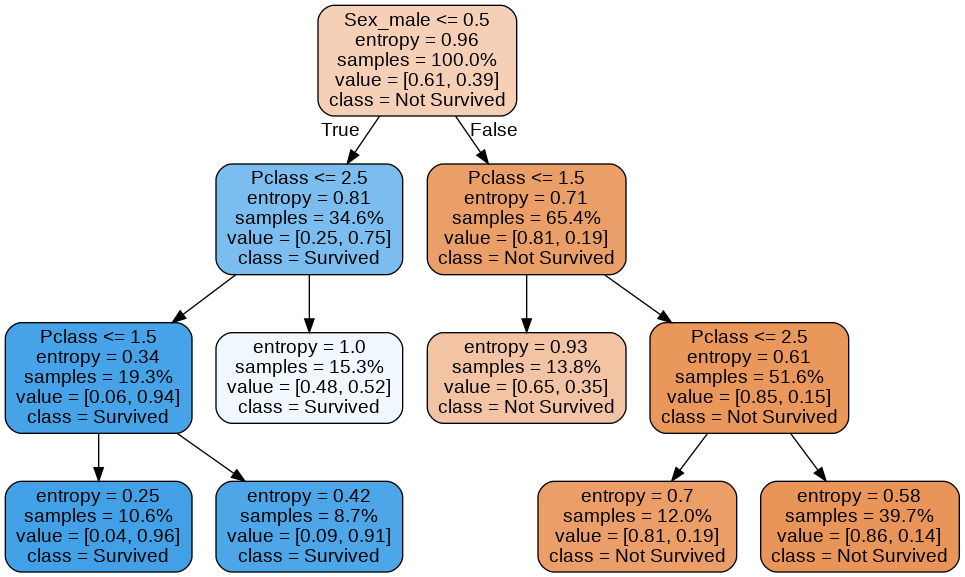

In [ ]:
dot_data = export_graphviz(model1, out_file=None, 
                        feature_names = X_train1.columns,
                        class_names = ['Not Survived','Survived'],
                        rounded = True, proportion = True, 
                        precision = 2, filled = True, impurity = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Now let's see the case with `Age` variable.

In [ ]:
data2 = pd.get_dummies(data_with_age, drop_first=True)
X_train2, X_test2, y_train, y_test = train_test_split(data2.drop(columns='Survived'),
                                                      data2[['Survived']],
                                                      random_state=0)

In [ ]:
start = time.perf_counter()
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(X_train2, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
print('Train accuracy: ', accuracy_score(model1.predict(X_train2), y_train))
print('Test accuracy: ', accuracy_score(model1.predict(X_test2), y_test))

Time taken: 0.003185623000263149 sec
Train accuracy:  0.902803738317757
Test accuracy:  0.7932960893854749


In [ ]:
dot_data = export_graphviz(model1, out_file=None, 
                        feature_names = X_train2.columns,
                        class_names = ['Not Survived','Survived'],
                        rounded = True, proportion = True, 
                        precision = 2, filled = True, impurity = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
start = time.perf_counter()
model1 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model1.fit(X_train2, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
print('Train accuracy: ', accuracy_score(model1.predict(X_train2), y_train))
print('Test accuracy: ', accuracy_score(model1.predict(X_test2), y_test))

Time taken: 0.002483312000094884 sec
Train accuracy:  0.8168224299065421
Test accuracy:  0.7821229050279329


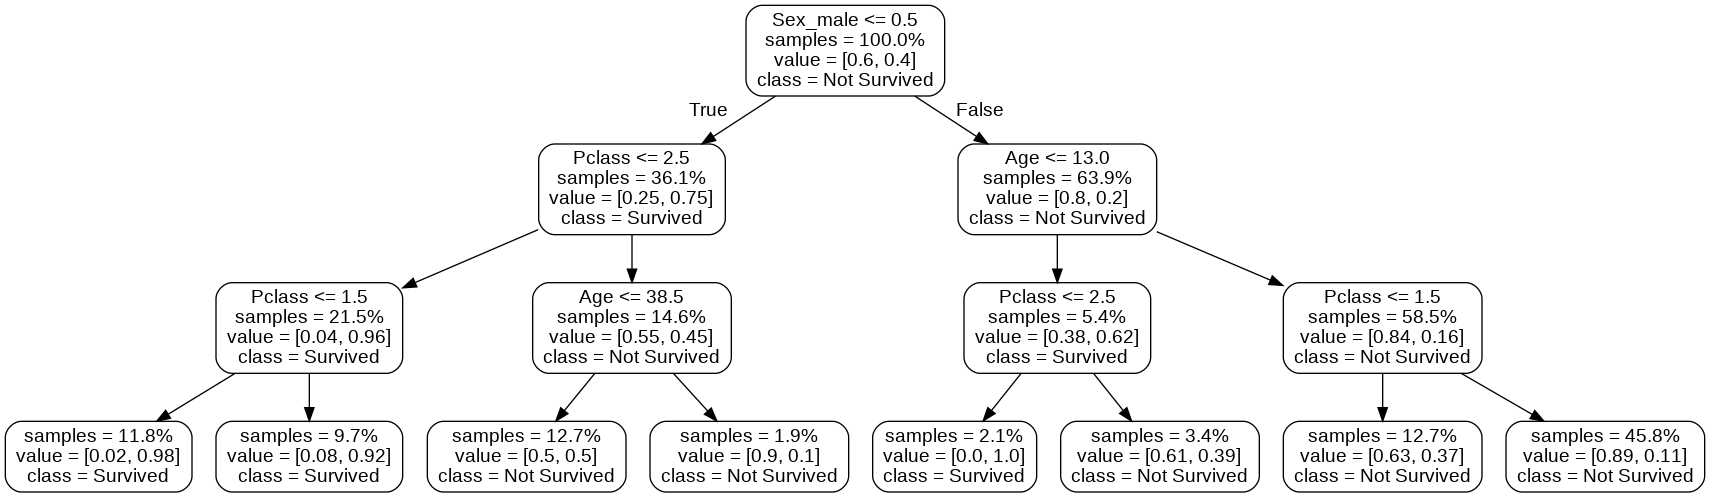

In [ ]:
dot_data = export_graphviz(model1, out_file=None, 
                        feature_names = X_train2.columns,
                        class_names = ['Not Survived','Survived'],
                        rounded = True, proportion = True, 
                        precision = 2, filled = False, impurity = False)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

We will get similar results if we make some changes to our implementation!

In [ ]:
from decision_tree_v3 import DTClassifier

In [ ]:
start = time.perf_counter()
model = DTClassifier(impurity='gini')
model.fit(X_train2, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
print('Train accuracy: ', accuracy_score(model.predict(X_train2), y_train))
print('Test accuracy: ', accuracy_score(model.predict(X_test2), y_test))

Time taken: 0.21247406099973887 sec
Train accuracy:  0.902803738317757
Test accuracy:  0.7932960893854749


In [ ]:
start = time.perf_counter()
model = DTClassifier(impurity='entropy')
model.fit(X_train2, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
print('Train accuracy: ', accuracy_score(model.predict(X_train2), y_train))
print('Test accuracy: ', accuracy_score(model.predict(X_test2), y_test))

Time taken: 0.215823150000233 sec
Train accuracy:  0.902803738317757
Test accuracy:  0.7932960893854749


# SVM with Kernels

Complete the incomplete parts in `Courses/MachineLearning/Labs/Lab_files/Lab4/svm_with_kernels.py` script and import the `SupportVectorMachine`.

In [ ]:
from svm_with_kernels import SupportVectorMachine
model = SupportVectorMachine(kernel_name='poly')

In [ ]:
y_train[y_train==0] = -1  # our implementation requires 1, -1 encoding of labels
y_test[y_test==0] = -1

In [ ]:
model.fit(X_train2, y_train)
prediction = model.predict(X_test2)
accuracy_score(prediction, y_test)

0.7653631284916201

Here you should get about $76\%$ accuracy.

In [ ]:
model = SupportVectorMachine(kernel_name='rbf', gamma=0.9)
model.fit(X_train2, y_train)
prediction = model.predict(X_test2)
accuracy_score(prediction, y_test)

0.770949720670391

Here you should get about $77\%$ accuracy.


## Experimenting with Adult dataset

The goal of this task is to understand better how the parameter values affect the performance of decision trees. We will do this on the dataset `adult.data.csv` originating from https://archive.ics.uci.edu/ml/datasets/adult . 

In [ ]:
np.random.seed(0)
data = pd.read_csv("adult.data.csv", dtype="category",
                   header = None, index_col = None,
                   na_values=["NA", " ?", ""])
data.columns = ["age", "workclass", "not_needed1", "education1",
                "education", "marital_status","occupation",
                "relationship", "race", "sex", "capital_gain",
                "capital_loss", "hours_per_week", "country", "income"]

data.dropna(inplace = True)

data["age"] = pd.to_numeric(data["age"])
data["education"] = pd.to_numeric(data["education"])
data["capital_gain"] = pd.to_numeric(data["capital_gain"])
data["capital_loss"] = pd.to_numeric(data["capital_loss"])
data["hours_per_week"] = pd.to_numeric(data["hours_per_week"])
data["capital_gain"] = data["capital_gain"] - data["capital_loss"]
data["income"] = data.income.str.strip()

data.drop(["not_needed1", "education1", "relationship", "capital_gain", "capital_loss",
          "country"], axis = 1, inplace = True)

a = data[data.income == ">50K"].index
b = data[data.income == "<=50K"].index
b = np.random.choice(b, size = len(a), replace = False)
data = data.loc[np.concatenate([a, b])]

In [ ]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,income
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,White,Male,45,>50K
8,31,Private,14,Never-married,Prof-specialty,White,Female,50,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,White,Male,40,>50K
10,37,Private,10,Married-civ-spouse,Exec-managerial,Black,Male,80,>50K
11,30,State-gov,13,Married-civ-spouse,Prof-specialty,Asian-Pac-Islander,Male,40,>50K


In [ ]:
data.income.value_counts()

<=50K    7508
>50K     7508
Name: income, dtype: int64

In [ ]:
data = pd.get_dummies(data, columns = ["workclass", "marital_status",
                                       "occupation", "race", "sex"],
                       drop_first=True)
data.head()

,age,education,hours_per_week,income,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
7,52,9,45,>50K,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
8,31,14,50,>50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9,42,13,40,>50K,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
10,37,10,80,>50K,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
11,30,13,40,>50K,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["income"], axis = 1),
                                                    data["income"],
                                                    test_size = 0.5,
                                                    random_state = 0)

In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)
print("Train Accuracy :",accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy :",accuracy_score(y_test, dt.predict(X_test)))

Train Accuracy : 0.7559936068193926
Test Accuracy : 0.7566595631326585


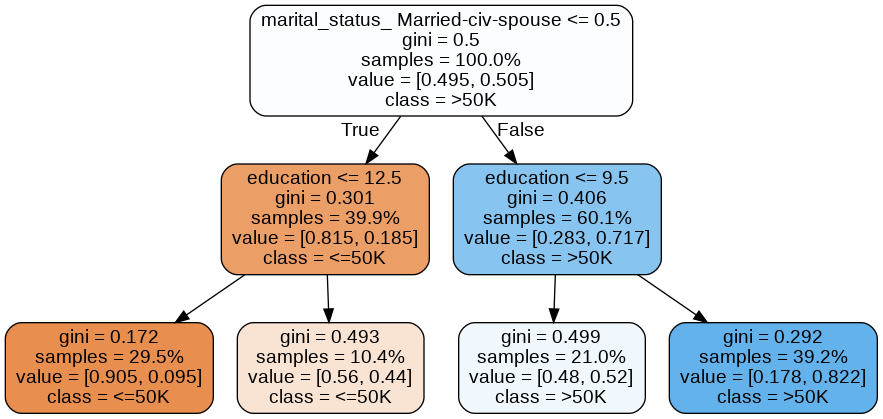

In [ ]:
dot_data = export_graphviz(dt, out_file=None,
                          feature_names=X_train.columns,  
                          class_names=["<=50K", ">50K"],  
                          filled=True, rounded=True, proportion=True,
                          special_characters=False) 

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

What do you notice in this tree?

Now let's try with the default hyper-parameters.

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Train Accuracy :",accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy :",accuracy_score(y_test, dt.predict(X_test)))

Train Accuracy : 0.9790889717634523
Test Accuracy : 0.7360149174214171


What do we notice?

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ('gini', 'entropy'),
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(2,10)}

model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters,
                   scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                   

In [ ]:
pd.DataFrame(clf.cv_results_)

In [ ]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}

In [ ]:
clf.fit(X_train, y_train)
print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, clf.predict(X_test)))

Train Accuracy : 0.8120671283963772
Test Accuracy : 0.8000799147575919


or we could just take the hyper-parameter combination and create a new model.

In [ ]:
dt = DecisionTreeClassifier()
dt.set_params(**clf.best_params_)
dt.fit(X_train, y_train)
print("Train Accuracy :",accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy :",accuracy_score(y_test, dt.predict(X_test)))

Train Accuracy : 0.8120671283963772
Test Accuracy : 0.8000799147575919


We can see the most important features of that help to predict the classes by using the `feature_importances_` attribute, which basically takes into account the amount of information gain that was achieved by each feature. See [this](https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees) for more details.

In [ ]:
df = pd.DataFrame(dt.feature_importances_,
                  X_train.columns, columns=["importances"])
df[df.importances > 0].sort_values(by="importances", ascending=False)

,importances
marital_status_ Married-civ-spouse,0.592953
education,0.252996
age,0.090283
hours_per_week,0.044622
occupation_ Other-service,0.007334
occupation_ Prof-specialty,0.004850
sex_ Male,0.003793
workclass_ Self-emp-inc,0.001279
marital_status_ Married-AF-spouse,0.001073
workclass_ Private,0.000506


In [ ]:
thres = 0.01
X_train2 = X_train[df.index[df.importances > thres]]
X_test2 = X_test[df.index[df.importances > thres]]

In [ ]:
dt = DecisionTreeClassifier()
dt.set_params(**clf.best_params_)
dt.fit(X_train2, y_train)
print("Train Accuracy :",accuracy_score(y_train, dt.predict(X_train2)))
print("Test Accuracy :",accuracy_score(y_test, dt.predict(X_test2)))

Train Accuracy : 0.810335641981886
Test Accuracy : 0.8015450186467767
